In [78]:
import numpy as np

def tanh(x):
  return np.tanh(x)

def d_tanh(x):
  return 1 - np.square(np.tanh(x))

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def d_sigmoid(x):
  return (1 - sigmoid(x)) * sigmoid(x)

def logloss(y , a):
  return -(y*np.log(a) + (1-y) * np.log(1-a))

def d_logloss(y , a):
  return (a-y) / (a*(1 - a))

In [79]:
class Layer:
  lr=0.0001

  def __init__(self, input, neur,act,d_act):
    self.W=np.random.randn(neur, input)
    self.b=np.zeros((neur,1))
    self.act=act
    self.d_act=d_act

  def feed_forward(self, A_prev):  
    self.A_prev=A_prev # saved for backpropogation
    self.Z=np.dot(self.W,self.A_prev)+self.b
    self.A=self.act(self.Z)
    return self.A

  def back_prop(self, dA):# All derivatives are with respect to cost like dC/dZ etc.
    dZ=np.multiply(self.d_act(self.Z),dA)
    dW=1/dZ.shape[0]*np.dot(dZ,self.A_prev.T)
    db=1/dZ.shape[0]*np.sum(dZ, axis=1, keepdims=True)
    dA_prev=np.dot(self.W.T,dZ)

    self.W = self.W - self.lr * dW
    self.b = self.b - self.lr * db
    return dA_prev  

In [80]:
import pandas as pd
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
df.head()
df['0.590'].value_counts()

0    19999
Name: 0.590, dtype: int64

In [81]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [82]:
x_train = np.array(train_X).reshape(60000 , 784)
#y_train = np.array(train_y).reshape(60000 , 1)
y_train = np.zeros((60000 , 10))
for i in range(len(y_train)):
  y_train[i][train_y[i]] = 1

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [83]:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)

In [84]:
m = 60000
epochs = 100

layers = [Layer(784 , 64 , tanh , d_tanh) , Layer(64 , 32 , tanh , d_tanh), Layer(32 , 10 , sigmoid , d_sigmoid)]
costs = []

In [85]:
for epoch in range(epochs):
  A = x_train.T
  print(epoch)
  for layer in layers:
    A = layer.feed_forward(A)

  

  cost = 1/m * np.sum(logloss(y_train.T , A))
  costs.append(cost)

  dA = d_logloss(y_train.T , A)
  for layer in reversed(layers):
    dA = layer.back_prop(dA)

A = x_train.T
for layer in layers:
  A = layer.feed_forward(A)
print(A)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[[3.07047980e-05 8.90801666e-01 4.78902049e-03 ... 1.08840820e-03
  9.64879398e-01 3.60985755e-01]
 [2.14883248e-02 1.31583275e-02 2.78971394e-02 ... 3.08657847e-03
  5.67482101e-03 4.17757144e-03]
 [1.44020380e-01 4.14475471e-02 1.38921742e-01 ... 3.64702329e-03
  8.69632318e-02 1.92455412e-01]
 ...
 [1.94010596e-02 1.93123984e-04 2.86208911e-02 ... 8.02260873e-02
  3.57889509e-03 8.79083769e-01]
 [1.64953297e-02 2.60674595e-02 4.34192343e-02 ... 1.13373536e-01
  7.34810844e-03 1.58228459e-01]
 [5.96204577e-03 3.15567249e-03 1.19564698e-02 ... 1.62689939e-01
  2.11140829e-03 3.15718226e-01]]


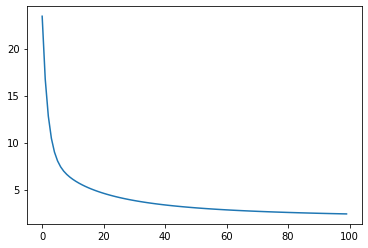

In [86]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)


In [87]:
x_test = np.array(test_X).reshape(10000 , 784)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

In [88]:
A = x_test.T
for layer in layers:
  A = layer.feed_forward(A)
print(A)

[[2.45506806e-03 1.43483851e-03 3.41550127e-02 ... 6.04743459e-04
  9.56031126e-04 9.90909614e-02]
 [1.83852520e-03 6.07062599e-02 9.27570714e-01 ... 8.32210399e-02
  3.96217826e-02 5.63491373e-03]
 [1.47579087e-01 4.03615457e-02 2.48801258e-02 ... 9.12638227e-02
  3.94950399e-03 4.97586966e-02]
 ...
 [2.80481925e-01 6.73349376e-03 1.46757090e-02 ... 4.26472415e-01
  1.43116639e-01 2.56048430e-02]
 [2.71967794e-02 3.34571696e-02 1.24908271e-01 ... 2.45854692e-02
  6.63792828e-02 4.05920174e-02]
 [4.51250477e-02 3.69395338e-03 2.45866078e-02 ... 7.60339375e-02
  1.32238674e-01 2.22757982e-02]]


In [89]:
print(A.shape)
A = A.T
A.shape

(10, 10000)


(10000, 10)

In [90]:
np.argmax(A[0])

7

In [91]:
test_y[0]

7

In [92]:
A[0]

array([0.00245507, 0.00183853, 0.14757909, 0.01446029, 0.0424508 ,
       0.01960007, 0.26805617, 0.28048193, 0.02719678, 0.04512505])

In [93]:
count = 0
for i in range(len(test_y)):
  if test_y[i] == np.argmax(A[i]):
    count+=1
  
print(count/100)

51.87
